In [1]:
import numpy as np    # Numerical Python

import pandas as pd   # Data analysis and manipulation library

import matplotlib.pyplot as plt   # for visualization

import seaborn as sns   # Statistical visualization library

import warnings
warnings.filterwarnings('ignore')

In [61]:
# Load the dataset
data = pd.read_csv("sumithaa.csv")

In [62]:
import sys; sys.executable

'/opt/anaconda3/bin/python'

In [63]:
data.dropna(how = 'all', inplace= True)##Removing the NA values
data.shape

(4999, 11)

In [64]:
data.head()##Check the head or tail of the table to know the data representation,
#different features. data.head() will display first five records in the dataset and data.tail() will display last five records of the dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [65]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4994,5,CASH_IN,185680.98,C1186328673,3756863.21,3942544.19,C985934102,1774746.94,1589065.96,0,0
4995,5,CASH_IN,67017.13,C1000600589,3942544.19,4009561.32,C1163619825,118844.67,51827.53,0,0
4996,5,CASH_IN,122744.28,C277549599,4009561.32,4132305.60,C1850042097,207106.34,84362.06,0,0
4997,5,CASH_IN,414729.24,C1185631996,4132305.60,4547034.84,C991505714,2109808.94,1695079.69,0,0
4998,5,CASH_IN,328776.10,C804559024,4547034.84,4875810.94,C977993101,1019467.84,962737.60,0,0


In [66]:
data.shape 

(4999, 11)

In [67]:
data.info() #data.info() will return total number of records, total number 
#of features with all features names their data types (float, int, object) and memory used.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            4999 non-null   int64  
 1   type            4999 non-null   object 
 2   amount          4999 non-null   float64
 3   nameOrig        4999 non-null   object 
 4   oldbalanceOrg   4999 non-null   float64
 5   newbalanceOrig  4999 non-null   float64
 6   nameDest        4999 non-null   object 
 7   oldbalanceDest  4999 non-null   float64
 8   newbalanceDest  4999 non-null   float64
 9   isFraud         4999 non-null   int64  
 10  isFlaggedFraud  4999 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 468.7+ KB


In [68]:
data.isnull().sum()#Check if there is any null values available in the dataset.

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [69]:
data.describe().T##data.describe() gives all the statistical information (like, count, mean, standard deviation (std), quantiles, median, etc.) 
#about each and every feature in the dataset.

,count,mean,std,min,25%,50%,75%,max
step,4999.0,1.890778e+00,1.175000e+00,1.00,1.000,1.00,3.000,5.0
amount,4999.0,1.015278e+05,3.009916e+05,6.42,3734.685,10951.21,108608.390,10000000.0
oldbalanceOrg,4999.0,1.041751e+06,2.301463e+06,0.00,570.500,26512.93,293185.990,12900000.0
newbalanceOrig,4999.0,1.063559e+06,2.343266e+06,0.00,0.000,18136.20,299000.375,13000000.0
oldbalanceDest,4999.0,9.184037e+05,2.542430e+06,0.00,0.000,0.00,364156.240,19500000.0
newbalanceDest,4999.0,1.065524e+06,2.924091e+06,0.00,0.000,0.00,270110.780,19200000.0
isFraud,4999.0,8.001600e-03,8.910198e-02,0.00,0.000,0.00,0.000,1.0
isFlaggedFraud,4999.0,0.000000e+00,0.000000e+00,0.00,0.000,0.00,0.000,0.0


In [70]:
print(data['type'].value_counts())

print(data['isFraud'].value_counts())

print(data['isFlaggedFraud'].value_counts())

PAYMENT     2587
CASH_IN     1081
CASH_OUT     631
TRANSFER     437
DEBIT        263
Name: type, dtype: int64
0    4959
1      40
Name: isFraud, dtype: int64
0    4999
Name: isFlaggedFraud, dtype: int64


In [71]:
data.corr()##Check the correlation value between different features

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.010787,0.113261,0.112284,0.108165,0.064322,0.035104,NaN
amount,0.010787,1.000000,0.148810,0.090188,0.289906,0.359582,0.228087,NaN
oldbalanceOrg,0.113261,0.148810,1.000000,0.994943,0.270414,0.220753,-0.004566,NaN
newbalanceOrig,0.112284,0.090188,0.994943,1.000000,0.278803,0.222933,-0.037960,NaN
oldbalanceDest,0.108165,0.289906,0.270414,0.278803,1.000000,0.914237,-0.028906,NaN
newbalanceDest,0.064322,0.359582,0.220753,0.222933,0.914237,1.000000,-0.008250,NaN
isFraud,0.035104,0.228087,-0.004566,-0.037960,-0.028906,-0.008250,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


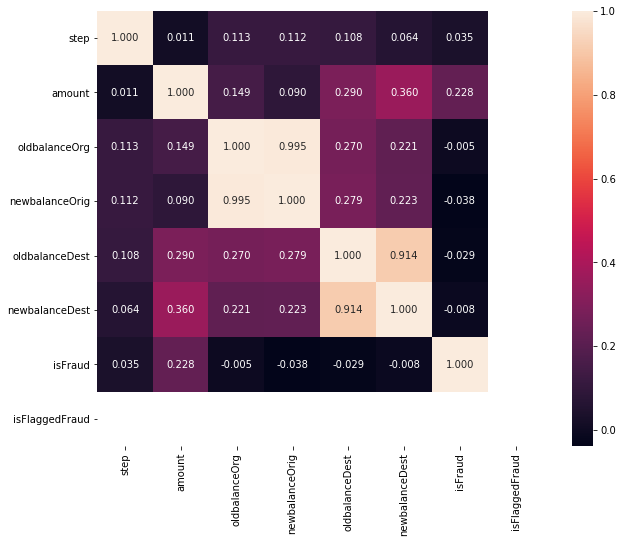

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True, fmt = '.3f')

In [73]:
data = data.drop(['oldbalanceDest','oldbalanceOrg'],axis = 1)

mylist

In [74]:
data.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0,0


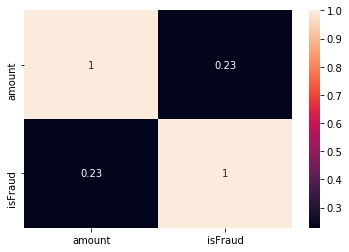

In [75]:
sns.heatmap(data[['amount','isFraud']].corr(),annot = True)

In [76]:
##here 0.23 percent fraud is detected from the above output 

In [77]:
df = pd.get_dummies(data['type'], drop_first=True)

In [78]:
data = pd.concat([data,df],axis=1)


In [79]:
data.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0,0,0,0,1,0


In [80]:
data.drop(labels = ['type','nameOrig','nameDest'], axis=1,inplace=True)


In [81]:
data.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,160296.36,0.0,0,0,0,0,1,0
1,1,1864.28,19384.72,0.0,0,0,0,0,1,0
2,1,181.00,0.00,0.0,1,0,0,0,0,1
3,1,181.00,0.00,0.0,1,0,1,0,0,0
4,1,11668.14,29885.86,0.0,0,0,0,0,1,0


In [82]:
X = data.drop(['isFraud'],axis=1) #Now separate the independent 
#varaibles as X and dependent variable i.e. isFraud as y
y = data['isFraud']

In [83]:
#Applying Machine Learning Algorithms
#Split the dataset into training as 70% and testing as 30%

In [84]:
#Logistic Regression
#It is Binary Classification Algorithm under linear_model module of sklearn library

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [86]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
lm_predict = logmodel.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(lm_predict,y_test))
print(confusion_matrix(lm_predict,y_test))

0.8133333333333334
[[1216    0]
 [ 280    4]]


In [88]:

##I got  81 percent accuracy got by using Logistic Regression algorithm

In [89]:
import sys; sys.executable

'/opt/anaconda3/bin/python'